# Imports

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split

**Loading Data**

In [ ]:
vp = pd.read_csv('/content/vp.csv')
vp[vp.columns[0]] = np.random.choice(new_names,len(vp[vp.columns[0]]))
vp.head()

,Name,Roll No.,Math1,Physics1,EE,CO,ED,FEC1,SGPGA1,Math2,Physics2,Chem,BME,Workshop,FEC2,SGPGA2
0,haashimu,2017/B1/67,7,6,7,7,6,5,9.5,7,7,7,7,7,5,9.8
1,mōì,2017/B1/68,7,7,7,7,5,3,9.4,6,7,7,6,4,6,9.2
2,shhei,2017/B1/69,6,5,3,6,4,3,7.7,4,6,5,4,6,4,7.8
3,jalgu g-,2017/B1/70,5,7,7,5,4,3,8.5,7,7,7,7,7,5,9.8
4,shi,2017/B1/71,6,7,7,5,5,3,8.8,7,6,7,7,6,5,9.5


In [2]:
vp = pd.read_csv('/content/vp.csv')

**Functions to be used** : **plot_graphs** : used to plot graphs for epochs vs loss,


**NNpredict** : used to create and train a neural 4 layered neural network(64,32,16,1 nodes respectively),
                            
                            
 **to_arr** :used to convert grades into array with numbers
                            

In [3]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
def NNpredict(X_train,X_test,y_train,y_test):
  model = tf.keras.Sequential([
                            tf.keras.layers.Dense(64, input_shape = [6], activation = 'relu'),
                            tf.keras.layers.Dense(32, activation = 'relu'),
                            tf.keras.layers.Dense(16, activation = 'relu'),
                            tf.keras.layers.Dense(1)])
  opt = tf.keras.optimizers.Adam(0.001)
  model.compile(loss = 'mse', optimizer = opt)
  history = model.fit(X_train,y_train, batch_size=X_train.shape[0],epochs=300, 
                    #callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)],
                    validation_data=(X_test,y_test))
  return model, history, sklearn.metrics.r2_score(y_test,model.predict(X_test))
def to_arr(stri):
  grade2idx = {'F':0,'P':1,'C':2,'B':3,'B+':4,'A':5,'A+':6,'O':7}
  temp = stri.split(' ')
  temp = [grade2idx[i] for i in temp]
  return np.array(temp)  

### Model for sem1 B batch

In [4]:
X=vp[['Math1', 'Physics1', 'EE', 'CO', 'ED', 'FEC1']] # taking the semester 1 subjects for B batch from our dataset
#Y = Final[['Math2', 'Physics2', 'Chem', 'BME', 'Workshop', 'FEC2']] this will be our predicted subjects
Y=vp['SGPGA2']
#X = X/28
# converting everything into array and splitting our data into train and test sets
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X,Y,test_size=0.3,random_state=101)
X_trainB = np.array(X_trainB)
X_testB = np.array(X_testB)
y_trainB = np.array(y_trainB)
y_testB = np.array(y_testB)

### Neural Network

Epoch 1/300
1/1 [==============================] - 0s 160ms/step - loss: 58.2546 - val_loss: 56.5754
Epoch 2/300
1/1 [==============================] - 0s 32ms/step - loss: 55.8241 - val_loss: 54.1078
Epoch 3/300
1/1 [==============================] - 0s 31ms/step - loss: 53.3948 - val_loss: 51.6293
Epoch 4/300
1/1 [==============================] - 0s 32ms/step - loss: 50.9634 - val_loss: 49.1716
Epoch 5/300
1/1 [==============================] - 0s 34ms/step - loss: 48.5527 - val_loss: 46.7766
Epoch 6/300
1/1 [==============================] - 0s 31ms/step - loss: 46.2054 - val_loss: 44.4807
Epoch 7/300
1/1 [==============================] - 0s 31ms/step - loss: 43.9553 - val_loss: 42.3082
Epoch 8/300
1/1 [==============================] - 0s 31ms/step - loss: 41.8284 - val_loss: 40.2328
Epoch 9/300
1/1 [==============================] - 0s 31ms/step - loss: 39.8065 - val_loss: 38.2265
Epoch 10/300
1/1 [==============================] - 0s 31ms/step - loss: 37.8423 - val_loss: 36.250

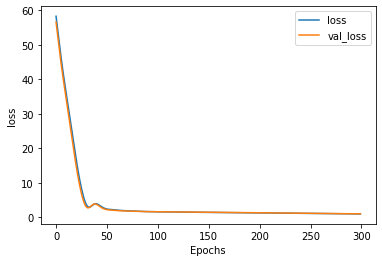

0.4302320754595369


In [5]:
m,h,r = NNpredict(X_trainB,X_testB,y_trainB,y_testB) # training neural network
plot_graphs(h,'loss') # plotting loss function
print(r) # printing r2 accuracy

**Randmom Forest Regressor**

In [7]:
RFmodel = RandomForestRegressor(n_estimators=900) 
RFmodel.fit(X_trainB,y_trainB)
predict = RFmodel.predict(X_testB) # training random forest regressor
sklearn.metrics.r2_score(y_testB,RFmodel.predict(X_testB)) # r2 score of random forest regressor
### finding out that random forest worked better than neural network ###

0.6201937411691927

## Model for sem1A batch

In [8]:
## now we have to do sem 1 b batch separately because of difference in subjects ##
X=vp[['Math1', 'Physics1', 'Chem', 'BME', 'Workshop', 'FEC1']] # taking the semester 1 subjects for A batch from our dataset
#Y = Final[['Math2', 'Physics2', 'Chem', 'BME', 'Workshop', 'FEC2']]
Y=vp['SGPGA2']
# converting everything to arrays and splitting our data into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y,test_size=0.3,random_state=101)
X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)

**Neural Network**

Epoch 1/300
1/1 [==============================] - 0s 87ms/step - loss: 43.9150 - val_loss: 43.0402
Epoch 2/300
1/1 [==============================] - 0s 34ms/step - loss: 42.4662 - val_loss: 41.5729
Epoch 3/300
1/1 [==============================] - 0s 34ms/step - loss: 41.0266 - val_loss: 40.1196
Epoch 4/300
1/1 [==============================] - 0s 35ms/step - loss: 39.6012 - val_loss: 38.6822
Epoch 5/300
1/1 [==============================] - 0s 34ms/step - loss: 38.1913 - val_loss: 37.2604
Epoch 6/300
1/1 [==============================] - 0s 33ms/step - loss: 36.7975 - val_loss: 35.8530
Epoch 7/300
1/1 [==============================] - 0s 34ms/step - loss: 35.4178 - val_loss: 34.4604
Epoch 8/300
1/1 [==============================] - 0s 34ms/step - loss: 34.0517 - val_loss: 33.0810
Epoch 9/300
1/1 [==============================] - 0s 33ms/step - loss: 32.6992 - val_loss: 31.7146
Epoch 10/300
1/1 [==============================] - 0s 44ms/step - loss: 31.3598 - val_loss: 30.3632

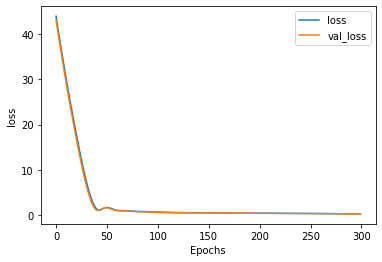

0.8318821181450362


In [9]:
m,h,r = NNpredict(X_train2,X_test2,y_train2,y_test2) # training neural network
plot_graphs(h,'loss') #plotting loss graph
print(r) # prining r2 score

**Random Forest**

In [18]:
y_test2[1]

6.7

In [32]:
def predi(n,model, X_test2, y_test2):
  temp=list(zip(model.predict(X_test2),y_test2))
  num = np.random.choice(np.arange(len(temp)),n)
  temp = [temp[i] for i in num]
  for i in temp:
    print('Predicted {}, Actual {}'.format(np.round(i[0],1),i[1]))

In [33]:
predi(10,RFmodel,X_test2,y_test2)

Predicted 5.9, Actual 5.8
Predicted 5.2, Actual 5.2
Predicted 5.7, Actual 5.6
Predicted 6.4, Actual 5.8
Predicted 6.9, Actual 7.9
Predicted 8.8, Actual 8.8
Predicted 7.9, Actual 8.2
Predicted 7.3, Actual 7.1
Predicted 9.3, Actual 9.4
Predicted 5.7, Actual 5.7


In [31]:
predi(10,RFmodel,X_test2,y_test2)

Actual 5.4, Predicted 5.9
Actual 8.7, Predicted 8.7
Actual 7.2, Predicted 7.4
Actual 6.0, Predicted 6.2
Actual 7.0, Predicted 6.9
Actual 5.1, Predicted 5.6
Actual 7.2, Predicted 6.6
Actual 5.1, Predicted 5.6
Actual 7.8, Predicted 7.2
Actual 5.7, Predicted 5.4


In [10]:
RFmodel = RandomForestRegressor(n_estimators=900)
RFmodel.fit(X_train2,y_train2) # making random forest regressor
predict = RFmodel.predict(X_test2) 
sklearn.metrics.r2_score(y_test2,RFmodel.predict(X_test2)) # r2 score for random forest regressor

0.8882496333220312

**Using our models to make a Custom Prediction**

In [ ]:
stri = input() # input your custom grades 
arr = to_arr(stri)
RFmodel.predict([arr])[0] # making our first custom prediction

B+ B+ A B+ B+ A


7.269444444444513